1) Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

3) Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

In [1]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
# Solution 1
data = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t', nrows=5000, encoding ='UTF-8', low_memory=False)

In [7]:
pd.set_option('display.max_row', data.shape[0])
pd.set_option('display.max_column', data.shape[1])

# Exploration et analyse de données

## Obejtif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arrière)
- Développer une première stratégie de modélisation

## Checklist de Base

### Analyse de forme :
- Identification variables interessant (futures & target) : 'product_name', 'energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'fiber_100g'
- lignes et colonnes : (1805550, 186)
- Types de variables : float64(125), int64(2), object(59) --> quantitative : 127, qualitative : 59
- Analyse de données manquantes : Beaucoup de NAN (Plus de la moitié des variables > 90% NaN)


## Analyse de forme

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 186 entries, code to carnitine_100g
dtypes: float64(125), int64(2), object(59)
memory usage: 7.1+ MB


<AxesSubplot:ylabel='None'>

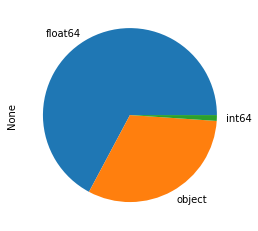

In [7]:
data.dtypes.value_counts().plot.pie()

#### Analyse de données manquantes

<AxesSubplot:>

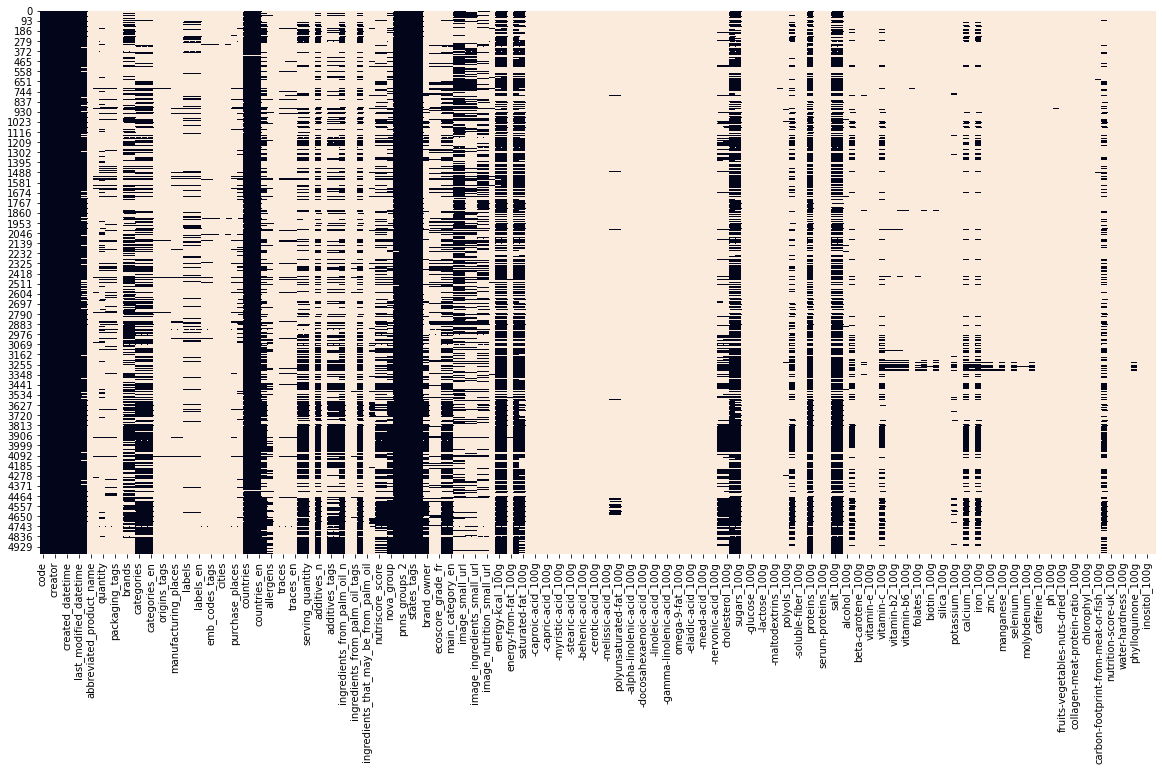

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [9]:
#(data.isna().mean()).sort_values(ascending=False)

# On calcule le pourcentage de données manquante par colonne et on affiche dans l'ordre décroissante
pd.DataFrame(data.isna().mean().round(4) * 100,
             columns=['Données manquantes en %'
                      ]).sort_values(by='Données manquantes en %',
                                     ascending=False)

,Données manquantes en %
-montanic-acid_100g,100.00
-eicosapentaenoic-acid_100g,100.00
-erucic-acid_100g,100.00
-mead-acid_100g,100.00
-gondoic-acid_100g,100.00
-elaidic-acid_100g,100.00
-oleic-acid_100g,100.00
omega-9-fat_100g,100.00
-dihomo-gamma-linolenic-acid_100g,100.00
-gamma-linolenic-acid_100g,100.00


## Analyse de fond

### Visualisation initiale - Elimination de données inutiles

In [8]:
# Supprimons les colonnes avec 90 % des données manquantes
# Parce qu'avec 90 % on ne peut quasiment rien en tirer
data = data[data.columns[data.isna().mean() <= 0.9]]

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     5000 non-null   object 
 1   url                                      5000 non-null   object 
 2   creator                                  5000 non-null   object 
 3   created_t                                5000 non-null   int64  
 4   created_datetime                         5000 non-null   object 
 5   last_modified_t                          5000 non-null   int64  
 6   last_modified_datetime                   5000 non-null   object 
 7   product_name                             4705 non-null   object 
 8   quantity                                 704 non-null    object 
 9   brands                                   2608 non-null   object 
 10  brands_tags                              2608 no

<AxesSubplot:>

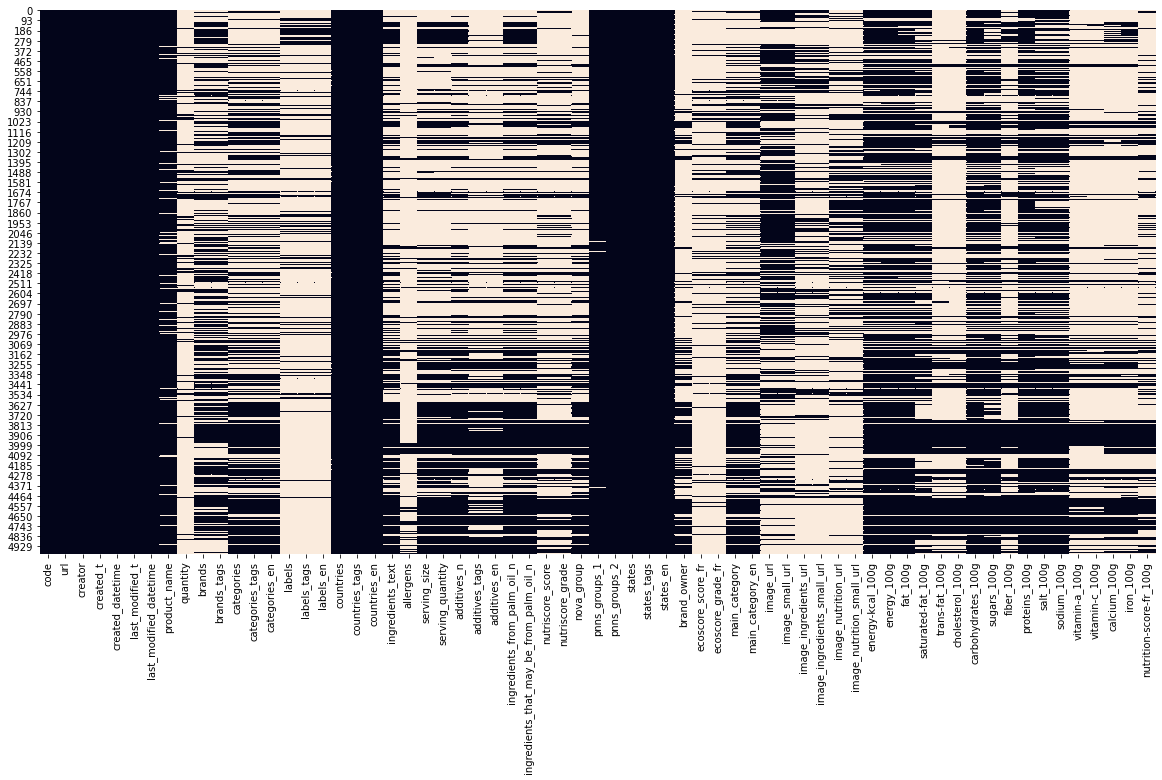

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [31]:
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,countries,countries_tags,countries_en,ingredients_text,allergens,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,375.0,1569.0,7.0,3.08,NaN,NaN,70.1,15.0,NaN,7.8,1.4,0.56,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Après avoir supprimé toutes les variables inutilisables (avec 90% ou plus de Nan)
On a commencé à reflechir à comment mettre au point notre idée d'appli à savoir : aide à choisir les produits minceurs


D'après les recherches qu'on a mené, on sait que la formule de calcul de l'nernergie d'un produit est : 
    'fat_100g'*9 + 'carbohydrates_100g'*4 + 'proteins_100g'*4

Alors qu'on sait que la connaissance de l'energie d'un produit renseigne si un produit est minceur ou non.
on aura à fixer une energie seuille separant les produits minceurs de ceux qui ne le sont pas.

In [9]:
# On ne choisit que les colonnes qui nous interesse dans notre démarche
data = data[['product_name', 'energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g']]

In [33]:
data.dtypes

product_name           object
energy_100g           float64
fat_100g              float64
carbohydrates_100g    float64
proteins_100g         float64
dtype: object

In [34]:
data.isna().mean()*100

product_name           5.90
energy_100g           19.92
fat_100g              20.90
carbohydrates_100g    20.64
proteins_100g         20.48
dtype: float64

<AxesSubplot:>

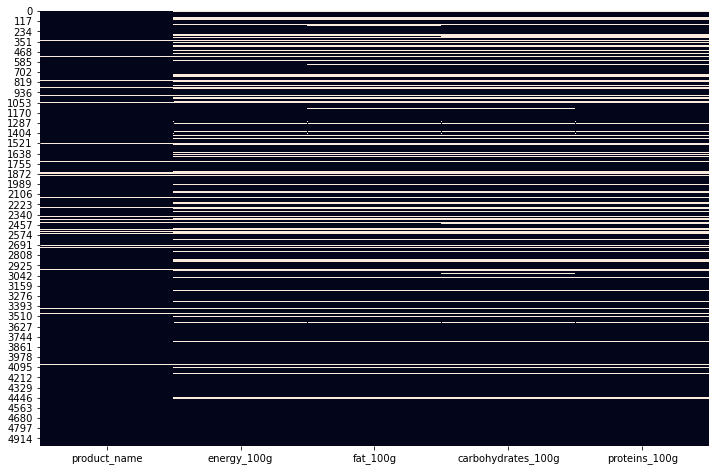

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isna(),cbar=False)

In [37]:
data.shape

(3921, 5)

In [38]:
data.head()

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Vitória crackers,1569.0,7.0,70.1,7.8
3,Hamburguesas de ternera 100%,3661.0,15.1,2.6,15.7
4,moutarde au moût de raisin,936.0,8.2,29.0,5.1
6,Sauce Sweety chili 0%,88.0,0.0,4.8,0.2
7,Mini coco,251.0,3.0,10.0,2.0


In [10]:
# Supprimons les lignes contenant des valeurs NAN
data_1 = data.dropna()

In [39]:
data.isna().sum()

product_name          0
energy_100g           0
fat_100g              0
carbohydrates_100g    0
proteins_100g         0
dtype: int64

<AxesSubplot:>

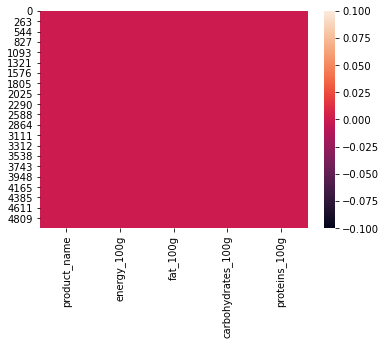

In [46]:
sns.heatmap(data_1.isna())

Sauvegargons notre DataFrame nettoyé dans un fichier csv

In [41]:
data.to_csv('Data_Cleaned_Open_Food')

In [ ]:
# 2EME OPTION

In [37]:
# 1ere méthode
data_2_ = data.copy()


In [39]:
for col in data_2_.drop(columns=['product_name']).columns:
    data_2_[col] = data_2_[col].fillna(data[col].mean())

In [40]:
data_2_.head()

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Vitória crackers,1569.000000,7.00000,70.100000,7.800000
1,Cacao,1402.291696,16.47351,36.245963,8.997708
2,Filetes de pollo empanado,1402.291696,16.47351,36.245963,8.997708
3,Hamburguesas de ternera 100%,3661.000000,15.10000,2.600000,15.700000
4,moutarde au moût de raisin,936.000000,8.20000,29.000000,5.100000


In [41]:
data_2_.isna().sum()

product_name          295
energy_100g             0
fat_100g                0
carbohydrates_100g      0
proteins_100g           0
dtype: int64

In [42]:
data_2_.to_csv('Donnees_nettoyees_Open_Food')

In [12]:
#2eme méthode
import numpy as np
from sklearn.impute import SimpleImputer
imptr = SimpleImputer(missing_values=np.nan, strategy='mean')


In [13]:
data.head()

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Vitória crackers,1569.0,7.0,70.1,7.8
1,Cacao,NaN,NaN,NaN,NaN
2,Filetes de pollo empanado,NaN,NaN,NaN,NaN
3,Hamburguesas de ternera 100%,3661.0,15.1,2.6,15.7
4,moutarde au moût de raisin,936.0,8.2,29.0,5.1


In [43]:
colonnes = ['energy_100g', 'fat_100g', 'carbohydrates_100g','proteins_100g']
data_2 = imptr.fit(data[colonnes])

In [44]:
data[colonnes] = data_2.transform(data[colonnes])

In [45]:
data.head()

,product_name,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Vitória crackers,1569.000000,7.00000,70.100000,7.800000
1,Cacao,1402.291696,16.47351,36.245963,8.997708
2,Filetes de pollo empanado,1402.291696,16.47351,36.245963,8.997708
3,Hamburguesas de ternera 100%,3661.000000,15.10000,2.600000,15.700000
4,moutarde au moût de raisin,936.000000,8.20000,29.000000,5.100000


<AxesSubplot:>

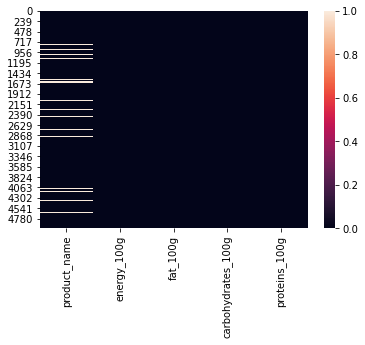

In [47]:
sns.heatmap(data.isna())